In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, \
f1_score, log_loss, classification_report, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка и предобработка данных

In [2]:
df = pd.DataFrame(data=load_iris()['data'],
                  columns=load_iris()['feature_names'])

df['target'] = load_iris()['target']
df = df[df.target != 2]
target_names = load_iris()['target_names'][:2]

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [4]:
sc = StandardScaler()

X = df.iloc[:, :-1]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [5]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

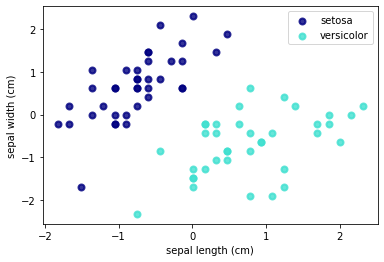

In [6]:
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_train_std[y_train == i, 0],
                X_train_std[y_train == i, 1],
                color=color,
                alpha=.8,
                lw=2,
                label=target_name)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()